# Text Transformations and Classification

### Note: using the PyTorch kernel

Where we process text in different ways in order to clean it up and make it more amenable to analysis. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Teaching/NLP')

Mounted at /content/drive


In [79]:
# For installing conda or miniconda in Colab
# !wget https://repo.anaconda.com/archive/Anaconda3-5.2.0-Linux-x86_64.sh && bash Anaconda3-5.2.0-Linux-x86_64.sh -bfp /usr/local

# Smaller miniconda if better
# !wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local 

# import sys
# sys.path.append('/usr/local/lib/python3.6/site-packages')

In [78]:
# !pip install rpy2  # this will need to be run in a separate notebook with the R kernel
!pip install ipypublish
!pip install cssselect

In [4]:
%pylab inline
import pandas as pd
import os
from ipypublish import nb_setup
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


In [5]:
import requests
from lxml.html import fromstring

In [6]:
#Copy the URL from the web site
url = 'https://economictimes.indiatimes.com'
html = requests.get(url, timeout=10).text

#See: http://infohost.nmt.edu/~shipman/soft/pylxml/web/etree-fromstring.html
doc = fromstring(html)      

#http://lxml.de/cssselect.html#the-cssselect-method
doc.cssselect(".active")


[<Element li at 0x7f8182de58f0>,
 <Element li at 0x7f8182de5950>,
 <Element li at 0x7f8182de59b0>,
 <Element li at 0x7f8182de5a10>,
 <Element li at 0x7f8182de5a70>,
 <Element li at 0x7f8182de5ad0>,
 <Element li at 0x7f8182de5b30>,
 <Element li at 0x7f8182de5b90>,
 <Element li at 0x7f8182de5bf0>,
 <Element li at 0x7f8182de5c50>]

In [7]:
x = doc.cssselect(".active li")    #Try a, h2, section if you like
headlines = [x[j].text_content() for j in range(len(x))]
headlines = headlines[:20]   #Needed to exclude any other stuff that was not needed. 
for h in headlines: 
    print(h)

Covid Impact: Loan pool sales halve in FY21
ABN AMRO pays $574 mn fine for laundering
EU official looks to align with India on 5G
Rising cases may delay new leasing recovery
US designates India a currency manipulator
India to fund capacity boost at SII: Source
Fresh virus surge may upend fuel demand
Experimental Mars helicopter takes flight 
India's EVs face practical, technical hurdles
Amid shortages, a black market for vaccines
Pandemic hurts working cap management
Indian-origin billionaire brothers buy Leon
UK PM Johnson cancels trip to India 
Attracting Infra Investments
Future case: SC stays further proceedings
What Biden saw during US' Afghan invasion

HDFC Bank embarks on tech agenda: MD
IT jobs back in demand as firms go digital
UAE visit: Pak denies India-specific agenda


## Remove punctuation from headlines

In [8]:
import string
def removePuncStr(s):
    for c in string.punctuation:
        s = s.replace(c," ")
    return s

def removePunc(text_array):
    return [removePuncStr(h) for h in text_array]

In [9]:
headlines = removePunc(headlines)
headlines

['Covid Impact  Loan pool sales halve in FY21',
 'ABN AMRO pays  574 mn fine for laundering',
 'EU official looks to align with India on 5G',
 'Rising cases may delay new leasing recovery',
 'US designates India a currency manipulator',
 'India to fund capacity boost at SII  Source',
 'Fresh virus surge may upend fuel demand',
 'Experimental Mars helicopter takes flight ',
 'India s EVs face practical  technical hurdles',
 'Amid shortages  a black market for vaccines',
 'Pandemic hurts working cap management',
 'Indian origin billionaire brothers buy Leon',
 'UK PM Johnson cancels trip to India ',
 'Attracting Infra Investments',
 'Future case  SC stays further proceedings',
 'What Biden saw during US  Afghan invasion',
 '',
 'HDFC Bank embarks on tech agenda  MD',
 'IT jobs back in demand as firms go digital',
 'UAE visit  Pak denies India specific agenda']

## Remove Numbers

In [10]:
def removeNumbersStr(s):
    for c in range(10):
        n = str(c)
        s = s.replace(n," ")
    return s

def removeNumbers(text_array):
    return [removeNumbersStr(h) for h in text_array]

In [11]:
headlines = removeNumbers(headlines)
headlines

['Covid Impact  Loan pool sales halve in FY  ',
 'ABN AMRO pays      mn fine for laundering',
 'EU official looks to align with India on  G',
 'Rising cases may delay new leasing recovery',
 'US designates India a currency manipulator',
 'India to fund capacity boost at SII  Source',
 'Fresh virus surge may upend fuel demand',
 'Experimental Mars helicopter takes flight ',
 'India s EVs face practical  technical hurdles',
 'Amid shortages  a black market for vaccines',
 'Pandemic hurts working cap management',
 'Indian origin billionaire brothers buy Leon',
 'UK PM Johnson cancels trip to India ',
 'Attracting Infra Investments',
 'Future case  SC stays further proceedings',
 'What Biden saw during US  Afghan invasion',
 '',
 'HDFC Bank embarks on tech agenda  MD',
 'IT jobs back in demand as firms go digital',
 'UAE visit  Pak denies India specific agenda']

## Remove Stopwords

Reference: https://pythonprogramming.net/stop-words-nltk-tutorial/

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopText(text_array):
    stop_words = set(stopwords.words('english'))
    stopped_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            if w.lower() not in stop_words:
                h2 = h2 + ' ' + w
        stopped_text.append(h2)
    return stopped_text

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
stopped_headlines = stopText(headlines)
stopped_headlines

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[' Covid Impact Loan pool sales halve FY',
 ' ABN AMRO pays mn fine laundering',
 ' EU official looks align India G',
 ' Rising cases may delay new leasing recovery',
 ' US designates India currency manipulator',
 ' India fund capacity boost SII Source',
 ' Fresh virus surge may upend fuel demand',
 ' Experimental Mars helicopter takes flight',
 ' India EVs face practical technical hurdles',
 ' Amid shortages black market vaccines',
 ' Pandemic hurts working cap management',
 ' Indian origin billionaire brothers buy Leon',
 ' UK PM Johnson cancels trip India',
 ' Attracting Infra Investments',
 ' Future case SC stays proceedings',
 ' Biden saw US Afghan invasion',
 '',
 ' HDFC Bank embarks tech agenda MD',
 ' jobs back demand firms go digital',
 ' UAE visit Pak denies India specific agenda']

## Stemming

https://pythonprogramming.net/stemming-nltk-tutorial/

In [14]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def stemText(text_array):
    stemmed_text = []
    for h in text_array:
        words = word_tokenize(h)
        h2 = ''
        for w in words:
            h2 = h2 + ' ' + PorterStemmer().stem(w)
        stemmed_text.append(h2)
    return stemmed_text

In [15]:
import nltk
nltk.download('punkt')
stemmed_headlines = stemText(headlines)
stemmed_headlines

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[' covid impact loan pool sale halv in FY',
 ' abn amro pay mn fine for launder',
 ' EU offici look to align with india on G',
 ' rise case may delay new leas recoveri',
 ' US design india a currenc manipul',
 ' india to fund capac boost at sii sourc',
 ' fresh viru surg may upend fuel demand',
 ' experiment mar helicopt take flight',
 ' india s ev face practic technic hurdl',
 ' amid shortag a black market for vaccin',
 ' pandem hurt work cap manag',
 ' indian origin billionair brother buy leon',
 ' UK PM johnson cancel trip to india',
 ' attract infra invest',
 ' futur case SC stay further proceed',
 ' what biden saw dure US afghan invas',
 '',
 ' hdfc bank embark on tech agenda MD',
 ' IT job back in demand as firm go digit',
 ' uae visit pak deni india specif agenda']

## Write all docs to separate text files

In [16]:
def write2textfile(s,filename):
    text_file = open(filename, "w")
    text_file.write(s)
    text_file.close()

In [17]:
import os
os.system('mkdir CTEXT')

j = 0
for h in headlines:
    j = j + 1
    fname = "CTEXT/" + str(j) + ".ctxt"  #using "ctxt" to denote a corpus related file
    write2textfile(h,fname)

## Create a Corpus

A corpus is a data structure that contains multiple documents.

Functions may be written at the corpus level itself. 

In [18]:
#Read in the corpus
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'CTEXT/'
ctext = PlaintextCorpusReader(corpus_root, '.*')
ctext

<PlaintextCorpusReader in '/content/drive/My Drive/Teaching/NLP/CTEXT'>

In [19]:
ctext.fileids()[:6]

['1.ctxt', '10.ctxt', '11.ctxt', '12.ctxt', '13.ctxt', '14.ctxt']

In [20]:
# We now have functions that apply to the entire corpus
print(ctext.words(), len(ctext.words()))  
print(len(set(ctext.words()))) # gives the vocabulary
print(ctext.words('1.ctxt'), len(ctext.words('1.ctxt')))

['Covid', 'Impact', 'Loan', 'pool', 'sales', 'halve', ...] 128
113
['Covid', 'Impact', 'Loan', 'pool', 'sales', 'halve', ...] 8


In [21]:
ctext.words('2.ctxt')

['ABN', 'AMRO', 'pays', 'mn', 'fine', 'for', ...]

## Text Classification using GLMNet

The large movie review dataset is here: https://ai.stanford.edu/~amaas/data/sentiment/
        
For an excellent description of glmnet see: https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html

Let's move over to the R program to run GLMNet, as it was written for that environmemt. We will execute the %%R code blocks in a separate notebook with a R kernel. 

In [22]:
%%R
install.packages(c("text2vec")) # VERY LONG INSTALL
# !conda install -c conda-forge r-text2vec -y   # Need the -y to not have to answer 'y' after packages are detected

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘float’, ‘RhpcBLASctl’, ‘RcppArmadillo’, ‘data.table’, ‘rsparse’, ‘mlapi’, ‘lgr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/float_0.2-4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1372759 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [23]:
%%R
install.packages(c("data.table","magrittr"))
# !conda install -c r r-data.table r-magrittr -y

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/data.table_1.14.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5303849 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =


In [24]:
%%R
install.packages("glmnet")
# !conda install -c conda-forge glmnet -y

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [25]:
%%R
library(text2vec)
library(data.table)

R[write to console]: data.table 1.14.0 using 1 threads (see ?getDTthreads).  Latest news: r-datatable.com



In [26]:
%%R
data("movie_review")
setDT(movie_review)
setkey(movie_review, id)
set.seed(2016L)
all_ids = movie_review$id
train_ids = sample(all_ids, 4000)
test_ids = setdiff(all_ids, train_ids)
train = movie_review[J(train_ids)]
test = movie_review[J(test_ids)]

print(head(train))

         id sentiment
1:   6748_8         1
2:   1294_7         1
3: 11206_10         1
4:  1217_10         1
5:  10395_8         1
6:   6531_8         1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [27]:
%%R
# Get from R into python, through csv file
write.csv(movie_review, "NLP_data/movie_review.csv", row.names=FALSE)

In [28]:
mr = pd.read_csv("NLP_data/movie_review.csv")
mr.head()

,id,sentiment,review
0,10000_8,1,Homelessness (or Houselessness as George Carli...
1,10001_4,0,This film lacked something I couldn't put my f...
2,10004_3,0,"\""It appears that many critics find the idea o..."
3,10004_8,1,"This isn't the comedic Robin Williams, nor is ..."
4,10006_4,0,"I don't know who to blame, the timid writers o..."


In [29]:
%%R
prep_fun = tolower
tok_fun = word_tokenizer

#Create an iterator to pass to the create_vocabulary function
it_train = itoken(train$review, 
             preprocessor = prep_fun, 
             tokenizer = tok_fun, 
             ids = train$id, 
             progressbar = FALSE)

#Now create a vocabulary
vocab = create_vocabulary(it_train)
print(vocab)

Number of docs: 4000 
0 stopwords:  ... 
ngram_min = 1; ngram_max = 1 
Vocabulary: 
       term term_count doc_count
    1: 0.02          1         1
    2:  0.3          1         1
    3: 0.48          1         1
    4:  0.5          1         1
    5: 0.89          1         1
   ---                          
38457:   to      22238      3792
38458:   of      23604      3787
38459:    a      26609      3876
38460:  and      26950      3863
38461:  the      54281      3971


In [30]:
%%R
vectorizer = vocab_vectorizer(vocab)
dtm_train = create_dtm(it_train, vectorizer)
print(dim(as.matrix(dtm_train)))
vocab = create_vocabulary(it_train, ngram = c(1, 2))
print(vocab)

[1]  4000 38461
Number of docs: 4000 
0 stopwords:  ... 
ngram_min = 1; ngram_max = 2 
Vocabulary: 
            term term_count doc_count
     1:     0.02          1         1
     2: 0.02_out          1         1
     3:   0.0_10          1         1
     4: 0.0_it's          1         1
     5:      0.3          1         1
    ---                              
406974:       to      22238      3792
406975:       of      23604      3787
406976:        a      26609      3876
406977:      and      26950      3863
406978:      the      54281      3971


In [31]:
%%R
library(glmnet)
library(magrittr)
NFOLDS = 5

vocab2 = vocab %>% prune_vocabulary(term_count_min = 10, 
                   doc_proportion_max = 0.5) 
print(vocab2)

R[write to console]: Loading required package: Matrix

R[write to console]: Loaded glmnet 4.1-1



Number of docs: 4000 
0 stopwords:  ... 
ngram_min = 1; ngram_max = 2 
Vocabulary: 
         term term_count doc_count
    1:   1948         10         9
    2:   1951         10         9
    3:   1966         10         6
    4: 1970_s         10         9
    5:   1977         10        10
   ---                            
17700:   like       3374      1920
17701:   they       3403      1642
17702:     by       3642      1885
17703:     he       4240      1571
17704:    his       4688      1721


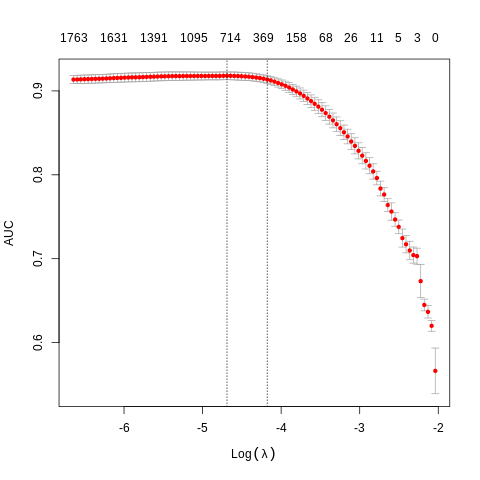

In [32]:
%%R
bigram_vectorizer = vocab_vectorizer(vocab2)
dtm_train = create_dtm(it_train, bigram_vectorizer)
res = cv.glmnet(x = dtm_train, y = train[['sentiment']], 
                 family = 'binomial', 
                 alpha = 1,
                 type.measure = "auc",
                 nfolds = NFOLDS,
                 thresh = 1e-3,
                 maxit = 1e3) 
plot(res)


In [33]:
%%R
print(names(res))
cat("AUC (area under curve):")
print(max(res$cvm))

 [1] "lambda"     "cvm"        "cvsd"       "cvup"       "cvlo"      
 [6] "nzero"      "call"       "name"       "glmnet.fit" "lambda.min"
[11] "lambda.1se" "index"     
AUC (area under curve):[1] 0.9179888


In [34]:
%%R
#Out-of-sample test
it_test = test$review %>% 
  prep_fun %>% 
  tok_fun %>% 
  itoken(ids = test$id, 
         # turn off progressbar because it won't look nice in rmd
         progressbar = FALSE)

dtm_test = create_dtm(it_test, bigram_vectorizer)
preds = predict(res, dtm_test, type = 'response')[,1]
glmnet:::auc(test$sentiment, preds)

[1] 0.9164907


In [35]:
%%R
res = glmnet(x = dtm_train, 
             y = train[['sentiment']], 
             family = 'binomial', 
             alpha = 1,
             thresh = 1e-3,
             maxit = 1e3) 
             
print(names(res))
print(res)

 [1] "a0"         "beta"       "df"         "dim"        "lambda"    
 [6] "dev.ratio"  "nulldev"    "npasses"    "jerr"       "offset"    
[11] "classnames" "call"       "nobs"      

Call:  glmnet(x = dtm_train, y = train[["sentiment"]], family = "binomial",      alpha = 1, thresh = 0.001, maxit = 1000) 

      Df  %Dev   Lambda
1      0  0.00 0.130300
2      1  0.44 0.124400
3      1  0.83 0.118700
4      2  1.25 0.113300
5      2  1.78 0.108200
6      3  2.32 0.103300
7      3  3.05 0.098570
8      3  3.71 0.094090
9      3  4.33 0.089820
10     4  5.04 0.085740
11     5  5.79 0.081840
12     6  6.63 0.078120
13     6  7.42 0.074570
14     7  8.26 0.071180
15     7  9.05 0.067940
16     9  9.95 0.064860
17    11 10.85 0.061910
18    12 11.76 0.059090
19    14 12.75 0.056410
20    17 13.74 0.053840
21    22 14.81 0.051400
22    24 15.94 0.049060
23    26 17.03 0.046830
24    26 18.11 0.044700
25    35 19.23 0.042670
26    37 20.35 0.040730
27    43 21.51 0.038880
28    49 22.70 0.03

In [36]:
%%R
f = res$beta[,35]   # feature coefficients
non0f = f[which(f!=0)]
words = names(non0f)
words

  [1] "7_10"             "br_4"             "4_10"            
  [4] "well_worth"       "top_notch"        "8_10"            
  [7] "loved_it"         "not_worth"        "wonderfully"     
 [10] "avoid_this"       "at_best"          "sit_through"     
 [13] "outstanding"      "highly_recommend" "disappointment"  
 [16] "gem"              "a_must"           "disappointing"   
 [19] "laughable"        "garbage"          "wasted"          
 [22] "masterpiece"      "fails"            "pointless"       
 [25] "mess"             "poorly"           "lame"            
 [28] "badly"            "7"                "not_even"        
 [31] "unless"           "powerful"         "perfectly"       
 [34] "predictable"      "enjoyable"        "very_well"       
 [37] "8"                "fantastic"        "watching_this"   
 [40] "dull"             "today"            "annoying"        
 [43] "crap"             "simple"           "horrible"        
 [46] "amazing"          "favorite"         "highly"   

In [37]:
%%R
wordcount = abs(non0f)
wordcount

            7_10             br_4             4_10       well_worth 
    0.1737067586     0.1537751268     0.3880592581     0.3721005160 
       top_notch             8_10         loved_it        not_worth 
    0.1157643981     0.1437147773     0.1253946753     0.2077053276 
     wonderfully       avoid_this          at_best      sit_through 
    0.0079554276     0.0036507732     0.0214432289     0.0607129693 
     outstanding highly_recommend   disappointment              gem 
    0.0047577928     0.0988630166     0.0818577013     0.1342509068 
          a_must    disappointing        laughable          garbage 
    0.1715726286     0.1759929451     0.2081529479     0.1119382084 
          wasted      masterpiece            fails        pointless 
    0.3001975715     0.0041195919     0.0058318607     0.1993796540 
            mess           poorly             lame            badly 
    0.2689532511     0.2970575807     0.1526924575     0.3828920102 
               7         not_even 

In [38]:
%%R
print(names(vocab2))
all_words = vocab2$term
all_term_count = vocab2$term_count
all_doc_count = vocab2$doc_count

[1] "term"       "term_count" "doc_count" 


In [39]:
words = %Rget words
wordcount = %Rget wordcount
all_words = %Rget all_words
all_term_count = %Rget all_term_count
all_doc_count = %Rget all_doc_count

In [40]:
all_words = array([j for j in all_words])
all_term_count = array([j for j in all_term_count])
all_doc_count = array([j for j in all_doc_count])

In [41]:
text = ""
for w in words:
    n = all_term_count[all_words==w][0]
    n = 1
    if n>0:
        for j in range(n):
            text = text + " " + w

(-0.5, 399.5, 199.5, -0.5)

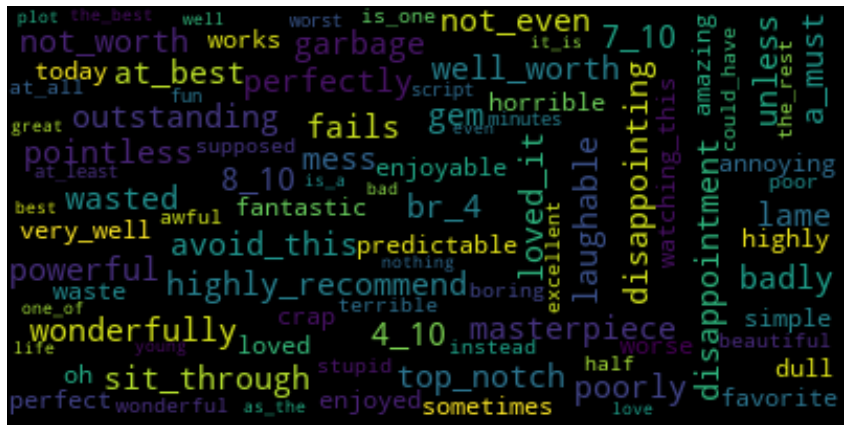

In [42]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=15).generate(text)

#Use pyplot from matplotlib
figure(figsize=(15,8))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")

## Use Fasttext from Facebook for classification of movie reviews

https://fasttext.cc/

https://fasttext.cc/docs/en/supervised-tutorial.html

Use NLPGluon: https://gluon-nlp.mxnet.io/model_zoo/text_classification/index.html

PyPi: https://pypi.org/project/fasttext/

See [Malafosse (2019)](https://medium.com/@media_73863/fasttext-sentiment-analysis-for-tweets-a-straightforward-guide-9a8c070449a2): FastText sentiment analysis for tweets: A straightforward guide; [pdf](https://drive.google.com/file/d/10XnkFAxVyGEDVEyxP8f3dFdMmlQvpRq5/view?usp=sharing) for a fun example. 

See also: https://autogluon.mxnet.io/tutorials/text_prediction/beginner.html

Here we will revisit the movie review dataset. 

The format for the input file is `__label__labelname text`

Example: `__label__0` and `__label__1` for a binary classifier. 

You can put as many labels as needed on one line. 

In [43]:
# Let's take a look at the movie database structure
movie_review = pd.read_csv('NLP_data/movie_review.csv')

# Convert df into the format required for fasttext
movie_review.sentiment = ["__label__" + str(movie_review.sentiment[j]) for j in movie_review.sentiment]
movie_review = movie_review.drop("id", axis=1)
print(movie_review.shape)
movie_review.head()

(5000, 2)


,sentiment,review
0,__label__0,Homelessness (or Houselessness as George Carli...
1,__label__1,This film lacked something I couldn't put my f...
2,__label__1,"\""It appears that many critics find the idea o..."
3,__label__0,"This isn't the comedic Robin Williams, nor is ..."
4,__label__1,"I don't know who to blame, the timid writers o..."


In [44]:
def cleanText(text):
    for c in string.punctuation:
        text = text.replace(c," ")
    text = text.replace('“','')
    text = text.replace('”','')
    text = text.replace('’','')
    text = text.replace('—',' ')
    # Remove numbers
    for c in range(10):
        n = str(c)
        text = text.replace(n," ")
    text = text.str.lower()
    text = stopText(text)
    text = stemText(text)
    text = [j.strip() for j in text]
    return text

In [45]:
%%time
# Run it with this cleanup and without to see the difference
# movie_review.review = cleanText(movie_review.review)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [46]:
tmp = movie_review.loc[:4000]
tmp.to_csv('NLP_data/movie_review_train.txt', sep=" ", header=False, index=False)
tmp = movie_review.loc[4000:]
tmp.to_csv('NLP_data/movie_review_test.txt', sep=" ", header=False, index=False)

In [47]:
!pip install fasttext

     |████████████████████████████████| 71kB 5.1MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3098837 sha256=d37d441bf6527f2648ccca5cbab9c7cb83fd666cebfb4eb6f2d2973ac470624a
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [48]:
%%time
import fasttext
model = fasttext.train_supervised('NLP_data/movie_review_train.txt', epoch=50) # Choose epochs to manage overfitting

CPU times: user 11.9 s, sys: 145 ms, total: 12 s
Wall time: 12 s


In [49]:
print(model.labels)

['__label__0', '__label__1']


In [50]:
print(len(model.words))
print(model.words[:100])

90603
['the', 'a', 'and', 'of', 'to', 'is', 'in', 'that', 'I', 'this', 'it', '/><br', 'was', 'as', 'with', 'for', 'but', 'The', 'on', 'movie', 'are', 'film', 'his', 'have', 'not', 'be', 'you', '</s>', 'by', 'he', 'an', 'at', 'one', 'from', 'who', 'like', 'all', 'they', 'her', 'or', 'about', 'has', 'so', 'just', 'some', 'out', 'very', 'more', 'would', 'if', 'when', 'their', 'had', 'good', 'what', 'only', 'really', 'up', 'It', "it's", 'can', 'she', 'which', 'were', 'my', 'even', 'no', 'see', 'than', 'there', 'into', 'been', '-', 'because', 'much', 'will', 'get', 'This', 'story', 'most', 'time', 'could', 'other', 'how', 'me', 'people', 'its', 'make', 'any', 'we', 'first', 'do', 'great', 'also', '/>The', 'made', 'think', "don't", 'him', 'being']


In [51]:
train = pd.read_csv("NLP_data/movie_review_train.txt", sep = " ", header=None)
test = pd.read_csv("NLP_data/movie_review_test.txt", sep = " ", header=None)
train.columns = ['sentiment','review']
test.columns = ['sentiment','review']
train.head()

,sentiment,review
0,__label__0,Homelessness (or Houselessness as George Carli...
1,__label__1,This film lacked something I couldn't put my f...
2,__label__1,"\""It appears that many critics find the idea o..."
3,__label__0,"This isn't the comedic Robin Williams, nor is ..."
4,__label__1,"I don't know who to blame, the timid writers o..."


In [52]:
model.predict("The good the bad and the ugly is an awesome movie")

(('__label__1',), array([0.99998164]))

In [53]:
k = randint(len(test)); print(k)
print(test.loc[k][0])
print(test.loc[k][1])
res = model.predict(test.loc[k][1])
print(res[0][0])

713
__label__0
Red Rock West is one of those tight noir thrillers we rarely see anymore. It's well paced, well acted and doesn't leave us with loose ends or unanswered questions so typical in this genre.<br /><br />Nicolas Cage stars as Michael, an unemployed Texas roughneck, desperate enough for a job to drive all the way to Wyoming for potential employment. He is honest to a fault, but always on the dark side of fate.<br /><br />After failing to obtain gainful employment, Michael stumbles into the Red Rock bar where the owner Wayne (J.T.Walsh) mistakes him for a contract killer he summoned from Dallas, hired to do in his lovely but lethal wife Suzanne (Lara Flynn Boyle).<br /><br />Wayne gives Michael the necessary details and a down payment for the hit on the adulterous Suzie. With no intent on following through, Michael accepts the money and then sets out to warn Suzanne of her impending demise. He also mails a letter to the local sheriff exposing the plot and splits.<br /><br />As

In [54]:
# Train dataset
yhat = [model.predict(train.loc[k][1])[0][0] for k in range(len(train))]
y0 = list(train.iloc[:,0])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y0, yhat)
acc = sum(diag(cm))/sum(cm)
print("acc =",acc)
print(cm)

acc = 0.9995001249687578
[[2017    2]
 [   0 1982]]


In [55]:
# Test dataset
yhat = [model.predict(test.loc[k][1])[0][0] for k in range(len(test))]
y0 = list(test.iloc[:,0])

cm = confusion_matrix(y0, yhat)
acc = sum(diag(cm))/sum(cm)
print("acc =",acc)
print(cm)

acc = 0.823
[[406  93]
 [ 84 417]]


## Using spaCy

spaCy has an excellent pipeline for doing text classification. We will learn about this pipeline here. 

We will also use scikit learn. https://scikit-learn.org/stable/

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [57]:
# Loading CSV file
df = pd.read_csv("NLP_data/movie_review.csv")
# View data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5000 non-null   object
 1   sentiment  5000 non-null   int64 
 2   review     5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [58]:
# Feedback Value count
df.sentiment.value_counts()

1    2517
0    2483
Name: sentiment, dtype: int64

In [59]:
!pip install spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [60]:
# Set up various spaCY stuff
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [61]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [62]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [63]:
df.columns

Index(['id', 'sentiment', 'review'], dtype='object')

In [64]:
from sklearn.model_selection import train_test_split

X = df['review'] # the features we want to analyze
ylabels = df['sentiment'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [65]:
%%time
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),   # replace with tf_idf, or bow to try
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

CPU times: user 3min 10s, sys: 3.94 s, total: 3min 14s
Wall time: 3min 18s


In [66]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.844
Logistic Regression Precision: 0.818295739348371
Logistic Regression Recall: 0.8800539083557951


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
acc = sum(diag(cm))/sum(cm)
print("acc =",acc)
print(cm)

acc = 0.844
[[613 145]
 [ 89 653]]


## Use AutoGluon Tabular on News Dataset

Apache MXNET: https://mxnet.apache.org/versions/1.7.0/

In [68]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet_cu110<2.0.0"
!pip install autogluon==0.1.0

     |████████████████████████████████| 1.5MB 8.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 784 kB 7.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 54.2.0
    Uninstalling setuptools-54.2.0:
      Successfully uninstalled setuptools-54.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 323.5 MB 366 bytes/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 230 kB 7.3 MB/s 
     |████████████████████████████████| 48 kB 4.2 MB/s 
     |████████████████████████████████| 311 kB 10.1 MB/s 
     |████████████████████████████████| 48 kB 5.8 MB/s 
     |████████████████████████████████| 950 kB 15.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 206 kB 29.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 kB/s 
     |████████████████████████████████| 131 kB 75.7 MB/s 
     |████████████████████████████████| 684 kB 71.3 MB/s 
     |████████████████████████████████| 1.1 MB 68.5 MB/s 
     |████████████████████████████████| 115 kB 78.4 MB/s 
     |██████████

In [69]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

In [70]:
# Read data
df = pd.read_csv('NLP_data/Sentences_AllAgree.txt', sep=".@", header=None, engine='python')  # Finbert data
# tmp = pd.read_csv('NLP_data/Sentences_75Agree.txt', sep=".@", header=None, engine='python')  
# df = pd.concat([df,tmp])
# tmp = pd.read_csv('NLP_data/Sentences_66Agree.txt', sep=".@", header=None, engine='python')  
# df = pd.concat([df,tmp])
# tmp = pd.read_csv('NLP_data/Sentences_50Agree.txt', sep=".@", header=None, engine='python')  
# df = pd.concat([df,tmp])
df.columns = ["Text","Label"]
print(df.shape)
df.head()

(2264, 2)


,Text,Label
0,"According to Gran , the company has no plans t...",neutral
1,"For the last quarter of 2010 , Componenta 's n...",positive
2,"In the third quarter of 2010 , net sales incre...",positive
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive


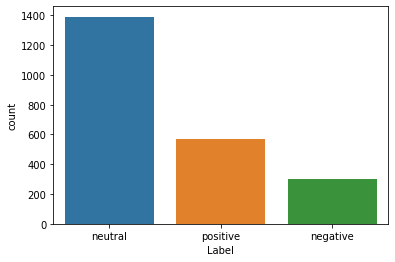

In [71]:
import seaborn as sns
sns.countplot(x='Label', data=df)
show()

In [72]:
%%time
#TRAIN THE MODEL

train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

predictor = TabularPredictor(label='Label').fit(train_data=train_data) #,    hyperparameters='multimodal')

# predictor = task.fit(train_data=train_data, label='Label')
performance = predictor.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20210419_234124/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210419_234124/"
AutoGluon Version:  0.1.0
Train Data Rows:    1584
Train Data Columns: 1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	3 unique label values:  ['neutral', 'positive', 'negative']


Train size = (1584, 2)  | Test size = (680, 2)


	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12356.2 MB
	Train Data (Original)  Memory Usage: 0.28 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting

	0.8454	 = Validation accuracy score
	23.63s	 = Training runtime
	0.26s	 = Validation runtime
Fitting model: KNeighborsUnif ...
	No valid features to train KNeighborsUnif... Skipping this model.
Fitting model: KNeighborsDist ...
	No valid features to train KNeighborsDist... Skipping this model.
Fitting model: RandomForestGini ...
	0.8517	 = Validation accuracy score
	0.96s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.8612	 = Validation accuracy score
	1.06s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.858	 = Validation accuracy score
	0.86s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.8549	 = Validation accuracy score
	0.94s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ...
/usr/local/lib/python3.7/dist-packages/fsspec/__init__.py:47: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for spec in entry_points.g

Fitting model: WeightedEnsemble_L2 ...
	0.8801	 = Validation accuracy score
	0.26s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 47.0s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210419_234124/")


Predictive performance on given data: accuracy = 0.9753787878787878
CPU times: user 34 s, sys: 7.08 s, total: 41.1 s
Wall time: 49.1 s


In [73]:
# TEST OUT-OF-SAMPLE

y_test = test_data['Label']
test_data_nolabel = test_data.drop(labels=['Label'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
y_prob = predictor.predict(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.8411764705882353
Evaluations on test data:
{
    "accuracy": 0.8411764705882353,
    "accuracy_score": 0.8411764705882353,
    "balanced_accuracy_score": 0.7245228895253703,
    "matthews_corrcoef": 0.6965723799082324
}
Detailed (per-class) classification report:
{
    "negative": {
        "precision": 0.6714285714285714,
        "recall": 0.5402298850574713,
        "f1-score": 0.5987261146496815,
        "support": 87
    },
    "neutral": {
        "precision": 0.8819742489270386,
        "recall": 0.9856115107913669,
        "f1-score": 0.9309173272933181,
        "support": 417
    },
    "positive": {
        "precision": 0.7916666666666666,
        "recall": 0.6477272727272727,
        "f1-score": 0.7124999999999999,
        "support": 176
    },
    "accuracy": 0.8411764705882353,
    "macro avg": {
        "precision": 0.7816898290074255,
        "recall": 0.7245228895253703,
        "f1-score": 0.7473811473143331,
        "support": 680
 

## Metrics 

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

https://srdas.github.io/MLBook2/3_MachineLearningOverview.html

https://srdas.github.io/MLBook2/3_MachineLearningOverview.html#ROC-and-AUC

## Movie Reviews, one more time, with AG-Tabular

In [74]:
train_data = pd.read_csv("NLP_data/movie_review_train.txt", sep = " ", header=None)
test_data = pd.read_csv("NLP_data/movie_review_test.txt", sep = " ", header=None)
train_data.columns = ['Label','Text']
test_data.columns = ['Label','Text']
print(train_data.shape, test_data.shape)
train_data.head()

(4001, 2) (1000, 2)


,Label,Text
0,__label__0,Homelessness (or Houselessness as George Carli...
1,__label__1,This film lacked something I couldn't put my f...
2,__label__1,"\""It appears that many critics find the idea o..."
3,__label__0,"This isn't the comedic Robin Williams, nor is ..."
4,__label__1,"I don't know who to blame, the timid writers o..."


In [75]:
%%time
#TRAIN THE MODEL

print("Train size =",train_data.shape," | Test size =",test_data.shape)

predictor = TabularPredictor(label='Label').fit(train_data=train_data) #,    hyperparameters='multimodal')
performance = predictor.evaluate(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20210419_234255/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210419_234255/"
AutoGluon Version:  0.1.0
Train Data Rows:    4001
Train Data Columns: 1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['__label__0', '__label__1']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = __label__1, class 0 = __label__0
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (__label__1) vs negative (__label__0) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to 

Train size = (4001, 2)  | Test size = (1000, 2)


		Fitting CategoryFeatureGenerator...
			Fitting CategoryMemoryMinimizeFeatureGenerator...
		Fitting TextSpecialFeatureGenerator...
			Fitting BinnedFeatureGenerator...
			Fitting DropDuplicatesFeatureGenerator...
		Fitting TextNgramFeatureGenerator...
			Fitting CountVectorizer for text features: ['Text']
			CountVectorizer fit with vocabulary size = 5515
		Reducing Vectorizer vocab size from 5515 to 1759 to avoid OOM error
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('object', ['text']) : 1 | ['Text']
	Types of features in processed data (raw dtype, special dtypes):
		('int', ['binned', 'text_special']) :   38 | ['Text.char_count', 'Text.word_count', 'Text.capital_ratio', 'Text.lower_ratio', 'Text.digit_ratio', ...]
		('int', ['text_ngram'])             : 1760 | ['__nlp__.10', '__nlp__.20', '__nlp__.30', '__nlp__.80', '__nlp__.able', ...]
	16.2s = Fit runtime
	1 features in original data used to gener

Epoch 22: early stopping


	0.854	 = Validation accuracy score
	30.95s	 = Training runtime
	2.01s	 = Validation runtime
Fitting model: LightGBMLarge ...
	0.84	 = Validation accuracy score
	13.81s	 = Training runtime
	0.04s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ...
	0.864	 = Validation accuracy score
	0.45s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 124.78s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210419_234255/")


Predictive performance on given data: accuracy = 0.9795051237190703
CPU times: user 3min 5s, sys: 7.91 s, total: 3min 12s
Wall time: 2min 11s


In [76]:
%%time
# TEST OUT-OF-SAMPLE

y_test = test_data['Label']
test_data_nolabel = test_data.drop(labels=['Label'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
y_prob = predictor.predict_proba(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.834
Evaluations on test data:
{
    "accuracy": 0.834,
    "accuracy_score": 0.834,
    "balanced_accuracy_score": 0.8340313361253444,
    "matthews_corrcoef": 0.6683621668012076,
    "f1_score": 0.834
}
Detailed (per-class) classification report:
{
    "__label__0": {
        "precision": 0.8233009708737864,
        "recall": 0.8496993987975952,
        "f1-score": 0.8362919132149902,
        "support": 499
    },
    "__label__1": {
        "precision": 0.845360824742268,
        "recall": 0.8183632734530938,
        "f1-score": 0.8316430020283975,
        "support": 501
    },
    "accuracy": 0.834,
    "macro avg": {
        "precision": 0.8343308978080273,
        "recall": 0.8340313361253444,
        "f1-score": 0.8339674576216938,
        "support": 1000
    },
    "weighted avg": {
        "precision": 0.8343529576618958,
        "recall": 0.834,
        "f1-score": 0.8339628087105072,
        "support": 1000
    }
}


CPU times: user 3.91 s, sys: 18.4 ms, total: 3.93 s
Wall time: 3.83 s


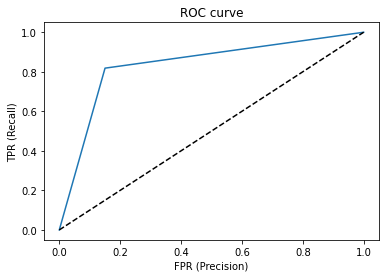

Area under curve (AUC):  0.8340313361253444


In [77]:
#ROC, AUC
from sklearn.metrics import roc_curve, auc
y_score = [1 if y_prob.loc[i][1]>y_prob.loc[i][0] else 0 for i in range(len(y_prob)) ]
y_true = array([1 if j=="__label__1" else 0 for j in y_test])
fpr, tpr, _ = roc_curve(y_true, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

No path specified. Models will be saved in: "AutogluonModels/ag-20210418_194632/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210418_194632/"
AutoGluon Version:  0.1.0
Train Data Rows:    4001
Train Data Columns: 1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['__label__0', '__label__1']
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = __label__1, class 0 = __label__0
	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (__label__1) vs negative (__label__0) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.
Using Feature Generators to 

All Logs will be saved to /content/drive/My Drive/Teaching/NLP/AutogluonModels/ag-20210418_194632/models/TextNeuralNetwork/task0/training.log


100%|██████████| 477/477 [00:00<00:00, 322kiB/s]


100%|██████████| 323k/323k [00:00<00:00, 1.74MiB/s]


100%|██████████| 436M/436M [00:07<00:00, 58.5MiB/s]
[Iter 6/280, Epoch 0] valid f1=4.0498e-01, mcc=3.2617e-01, roc_auc=7.6858e-01, accuracy=6.1800e-01, log_loss=6.7251e-01, accuracy=6.1800e-01, time spent=19.353s, total time spent=1.61min. Find new best=True, Find new top-3=True
[Iter 12/280, Epoch 0] valid f1=8.8632e-01, mcc=7.6741e-01, roc_auc=9.6454e-01, accuracy=8.8200e-01, log_loss=2.7600e-01, accuracy=8.8200e-01, time spent=19.350s, total time spent=3.26min. Find new best=True, Find new top-3=True
[Iter 18/280, Epoch 0] valid f1=8.8742e-01, mcc=8.0778e-01, roc_auc=9.6958e-01, accuracy=8.9800e-01, log_loss=3.1387e-01, accuracy=8.9800e-01, time spent=19.272s, total time spent=4.88min. Find new best=True, Find new top-3=True
[Iter 24/280, Epoch 0] valid f1=8.8053e-01, mcc=7.9615e-01, roc_auc=9.7896e-01, accuracy=8.9200e-01, log_loss=2.6181e-01, accuracy=8.9200e-01, time spent=19.257s, total time spent=6.48min. Find new best=False, Find new top-3=True
[Iter 30/280, Epoch 1] valid f1=

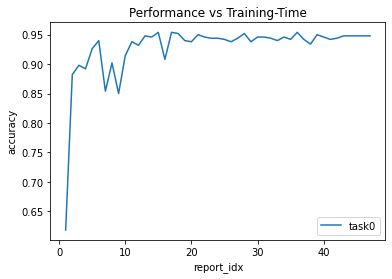

	0.952	 = Validation accuracy score
	4465.99s	 = Training runtime
	20.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.96	 = Validation accuracy score
	0.32s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 4577.55s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210418_194632/")
Evaluation: accuracy on test data: 0.948
Evaluations on test data:
{
    "accuracy": 0.948,
    "accuracy_score": 0.948,
    "balanced_accuracy_score": 0.9479757919031677,
    "matthews_corrcoef": 0.8962527765529131,
    "f1_score": 0.948
}
Detailed (per-class) classification report:
{
    "__label__0": {
        "precision": 0.9589322381930184,
        "recall": 0.935871743486974,
        "f1-score": 0.947261663286004,
        "support": 499
    },
    "__label__1": {
        "precision": 0.9376218323586745,
        "recall": 0.9600798403193613,
        "f1-score": 0.9487179487179488,
        "supp

In [ ]:
%%time
predictor = TabularPredictor(label='Label').fit(train_data=train_data, hyperparameters='multimodal')
y_test = test_data['Label']
test_data_nolabel = test_data.drop(labels=['Label'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)